# MNIST classification with TensorFlow (Preview)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_valid = x_train[:50000], x_train[50000:]
y_train, y_valid = y_train[:50000], y_train[50000:]

x_train = x_train.reshape(50000,28*28)/256
x_valid = x_valid.reshape(-1, 28*28)/256
x_test  = x_test.reshape(-1, 28*28)/256

y_train_one_hot = np.eye(10)[y_train]
y_valid_one_hot = np.eye(10)[y_valid]

In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

## Define 2-Layer MLP

In [4]:
input_tensor = Input(28*28)
x = Dense(100, activation='sigmoid', kernel_initializer='glorot_normal')(input_tensor)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=x)
optim = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

2023-06-26 11:43:00.248840: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-26 11:43:00.252869: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Train and Predict

In [5]:
EPOCHS = 20
history = model.fit(x_train, y_train_one_hot, batch_size=250, epochs=EPOCHS, validation_data=(x_valid, y_valid_one_hot))

2023-06-26 11:43:02.128950: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/20
200/200 [==============================] - 2s 7ms/step - loss: 2.2974 - accuracy: 0.2048 - val_loss: 2.0806 - val_accuracy: 0.5562
Epoch 2/20
200/200 [==============================] - 1s 3ms/step - loss: 2.0278 - accuracy: 0.5747 - val_loss: 1.8636 - val_accuracy: 0.6984
Epoch 3/20
200/200 [==============================] - 1s 4ms/step - loss: 1.8227 - accuracy: 0.6854 - val_loss: 1.6628 - val_accuracy: 0.7370
Epoch 4/20
200/200 [==============================] - 1s 3ms/step - loss: 1.6304 - accuracy: 0.7236 - val_loss: 1.4810 - val_accuracy: 0.7656
Epoch 5/20
200/200 [==============================] - 1s 3ms/step - loss: 1.4605 - accuracy: 0.7497 - val_loss: 1.3241 - val_accuracy: 0.7943
Epoch 6/20
200/200 [==============================] - 1s 6ms/step - loss: 1.3148 - accuracy: 0.7707 - val_loss: 1.1911 - val_accuracy: 0.8079
Epoch 7/20
200/200 [==============================] - 1s 6ms/step - loss: 1.1946 - accuracy: 0.7830 - val_loss: 1.0808 - val_accuracy: 0.8186
Epoch 

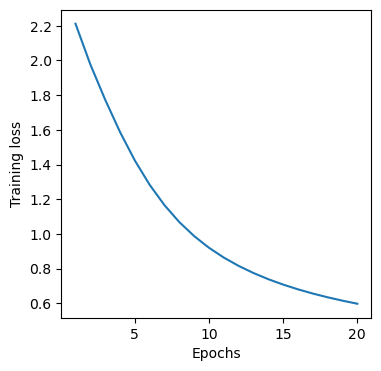

In [6]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1, EPOCHS+1), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

In [7]:
pred = model.predict(x_test)
pred_label = np.argmax(pred, axis = 1)
test_acc = np.sum(pred_label==y_test)/y_test.shape[0]
print('Test Accuracy:', test_acc*100, '%')

Test Accuracy: 86.94 %
